In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, PrecisionRecallDisplay, average_precision_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from itertools import cycle
import warnings
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter
from sklearn.model_selection import GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.utils import shuffle
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import label_binarize

In [2]:
df = pd.read_csv("THESSALONIKI.csv")

In [3]:
warnings.filterwarnings("ignore")

In [4]:
df

,Gender,Age,Driver_licence,Truck_licence,Motor_licence,Bike_access,Hhsize,Vehicles,Income,Mode,...,Cost,Safety,Environment,Health,Weather,Parking,Car_freq,Bus_freq,Walk_freq,Distance
0,Άνδρας,21 - 30,0,0,0,0,4,3,500 - 1000,Λεωφορείο,...,3,2,4,5,3,4,Καθόλου,Αρκετές φορές (4-5 μέρες την εβδομάδα),Καθημερινά,7.12
1,Άνδρας,21 - 30,0,0,0,0,3,1,500 - 1000,Λεωφορείο,...,4,4,2,2,2,3,Καθόλου,Καθημερινά,Λίγες φορές (2-3 μέρες την εβδομάδα),7.60
2,Γυναίκα,21 - 30,0,0,0,0,3,1,0 - 500,Λεωφορείο,...,5,3,2,1,4,2,Καθόλου,Καθημερινά,Αρκετές φορές (4-5 μέρες την εβδομάδα),6.60
3,Άνδρας,21 - 30,1,0,0,0,3,2,500 - 1000,Αμάξι,...,5,5,2,3,5,5,Αρκετές φορές (4-5 μέρες την εβδομάδα),Καθόλου,Λίγες φορές (2-3 μέρες την εβδομάδα),19.60
4,Γυναίκα,21 - 30,0,0,0,0,4,1,500 - 1000,Πόδια,...,5,5,5,4,5,1,Καθόλου,Σπάνια (1 μέρα την εβδομάδα),Καθημερινά,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,Γυναίκα,21 - 30,1,0,0,0,4,3,1000 - 1500,Λεωφορείο,...,1,2,3,2,1,1,Αρκετές φορές (4-5 μέρες την εβδομάδα),Καθημερινά,Καθημερινά,8.00
246,Άνδρας,51 - 60,1,0,0,0,3,2,1500 - 2000,Αμάξι,...,5,5,4,4,4,4,Καθημερινά,Καθόλου,Λίγες φορές (2-3 μέρες την εβδομάδα),29.20
247,Άνδρας,41 - 50,1,0,0,0,3,2,1500 - 2000,Αμάξι,...,5,4,4,4,4,5,Αρκετές φορές (4-5 μέρες την εβδομάδα),Καθόλου,Αρκετές φορές (4-5 μέρες την εβδομάδα),24.30
248,Γυναίκα,20 και κάτω,0,0,0,0,3,0,0 - 500,Πόδια,...,2,2,4,4,5,2,Καθόλου,Λίγες φορές (2-3 μέρες την εβδομάδα),Καθημερινά,1.50


In [5]:
print(df.columns)

Index(['Gender', 'Age', 'Driver_licence', 'Truck_licence', 'Motor_licence',
       'Bike_access', 'Hhsize', 'Vehicles', 'Income', 'Mode', 'Time',
       'Depart_time', 'Convenience', 'Cost', 'Safety', 'Environment', 'Health',
       'Weather', 'Parking', 'Car_freq', 'Bus_freq', 'Walk_freq', 'Distance'],
      dtype='object')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          250 non-null    object 
 1   Age             250 non-null    object 
 2   Driver_licence  250 non-null    int64  
 3   Truck_licence   250 non-null    int64  
 4   Motor_licence   250 non-null    int64  
 5   Bike_access     250 non-null    int64  
 6   Hhsize          250 non-null    int64  
 7   Vehicles        250 non-null    int64  
 8   Income          250 non-null    object 
 9   Mode            250 non-null    object 
 10  Time            250 non-null    int64  
 11  Depart_time     250 non-null    object 
 12  Convenience     250 non-null    int64  
 13  Cost            250 non-null    int64  
 14  Safety          250 non-null    int64  
 15  Environment     250 non-null    int64  
 16  Health          250 non-null    int64  
 17  Weather         250 non-null    int

In [7]:
df.isnull().any()

Gender            False
Age               False
Driver_licence    False
Truck_licence     False
Motor_licence     False
Bike_access       False
Hhsize            False
Vehicles          False
Income            False
Mode              False
Time              False
Depart_time       False
Convenience       False
Cost              False
Safety            False
Environment       False
Health            False
Weather           False
Parking           False
Car_freq          False
Bus_freq          False
Walk_freq         False
Distance          False
dtype: bool

In [8]:
df.duplicated().sum()

0

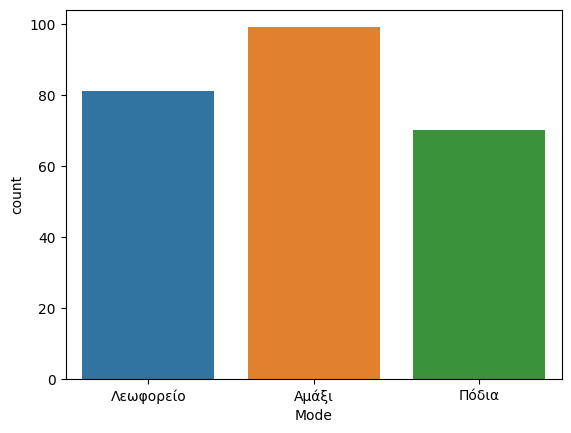

In [9]:
sns.countplot(x='Mode', data=df)
plt.show()

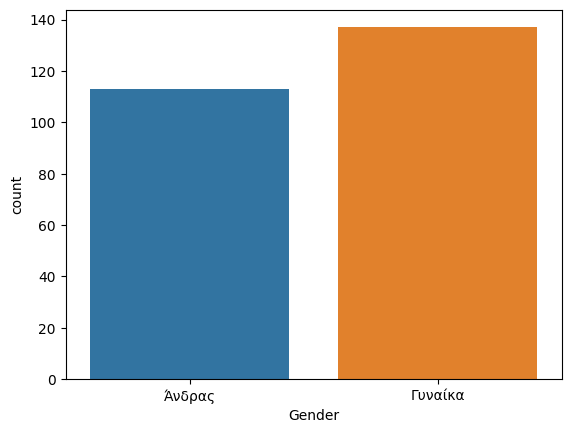

In [10]:
sns.countplot(x='Gender', data=df)
plt.show()

In [11]:
df['Driver_licence'] = df['Driver_licence'].map({0: 'No', 1: 'Yes'})

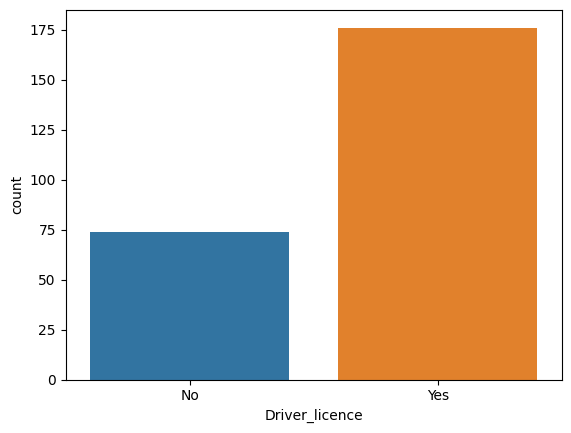

In [12]:
sns.countplot(x='Driver_licence', data=df)
plt.show()

In [13]:
df['Truck_licence'] = df['Truck_licence'].map({0: 'No', 1: 'Yes'})

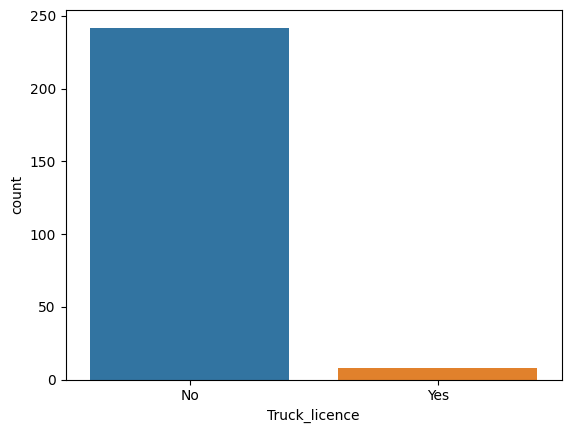

In [14]:
sns.countplot(x='Truck_licence', data=df)
plt.show()

In [15]:
df['Motor_licence'] = df['Motor_licence'].map({0: 'No', 1: 'Yes'})

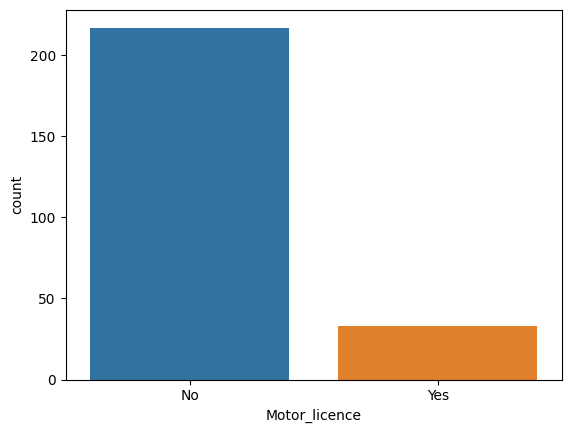

In [16]:
sns.countplot(x='Motor_licence', data=df)
plt.show()

In [17]:
df['Bike_access'] = df['Bike_access'].map({0: 'No', 1: 'Yes'})

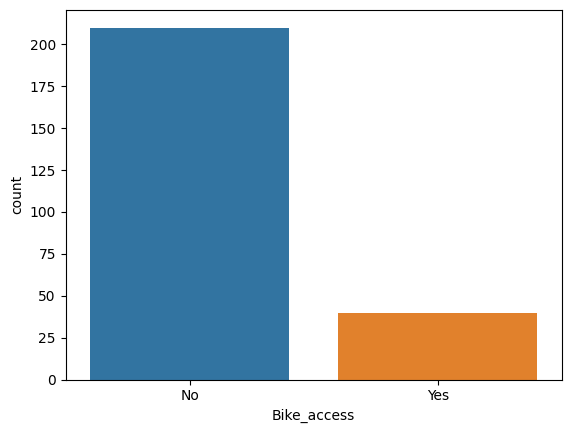

In [18]:
sns.countplot(x='Bike_access', data=df)
plt.show()

In [19]:
order_time = ["06.00 - 09.00", "09.00 - 12.00", "12.00 - 15.00", "15.00 - 18.00", "18.00 - 21.00", "00.00 -03.00", "03.00 - 06.00"]

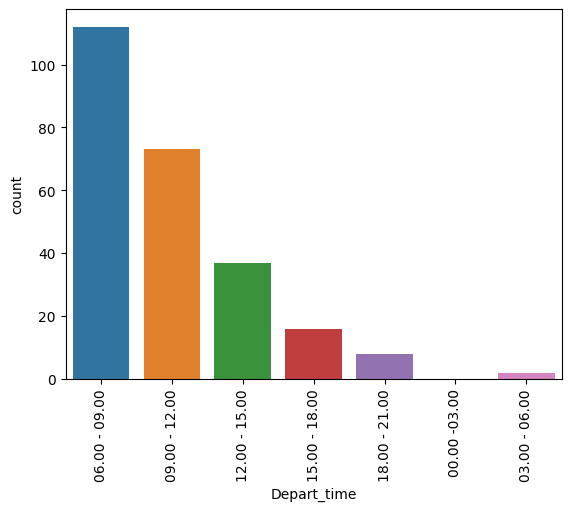

In [20]:
sns.countplot(x='Depart_time', data=df, order=order_time)
plt.xticks(rotation=90)
plt.show()

In [21]:
df['Convenience'] = df['Convenience'].map({1: "Totally disagree", 2: "Disagree", 3: "Neutral", 4: "Agree", 5: "Totally agree"})

In [22]:
order_likert = ["Totally disagree", "Disagree", "Neutral", "Agree", "Totally agree"]

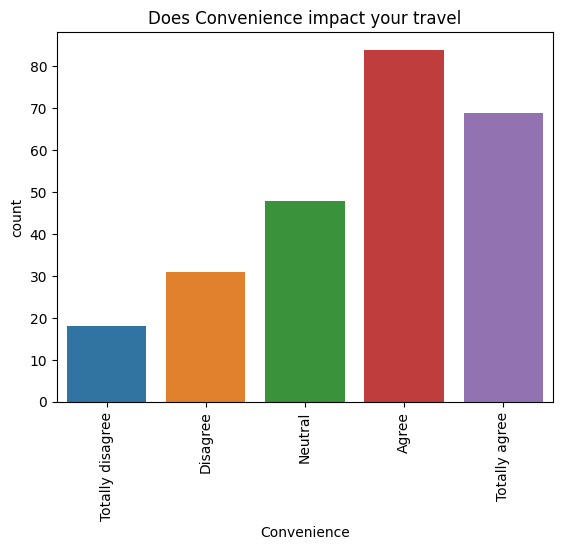

In [23]:
sns.countplot(x='Convenience', data=df, order = order_likert)
plt.title('Does Convenience impact your travel')
plt.xticks(rotation=90)
plt.show()

In [24]:
df['Cost'] = df['Cost'].map({1: "Totally disagree", 2: "Disagree", 3: "Neutral", 4: "Agree", 5: "Totally agree"})

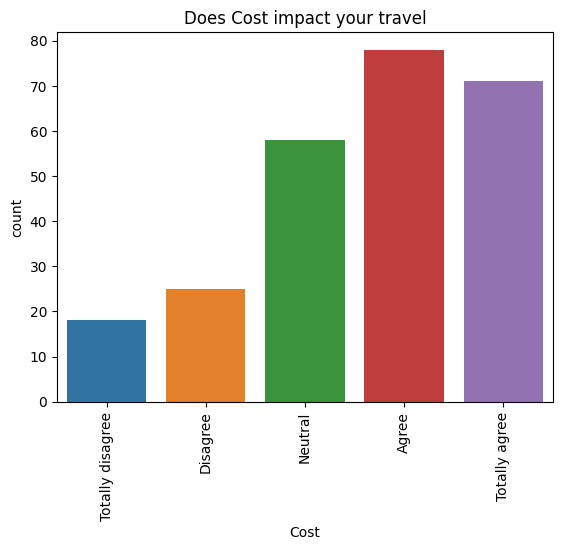

In [25]:
sns.countplot(x='Cost', data=df, order = order_likert)
plt.title('Does Cost impact your travel')
plt.xticks(rotation=90)
plt.show()

In [26]:
df['Health'] = df['Health'].map({1: "Totally disagree", 2: "Disagree", 3: "Neutral", 4: "Agree", 5: "Totally agree"})

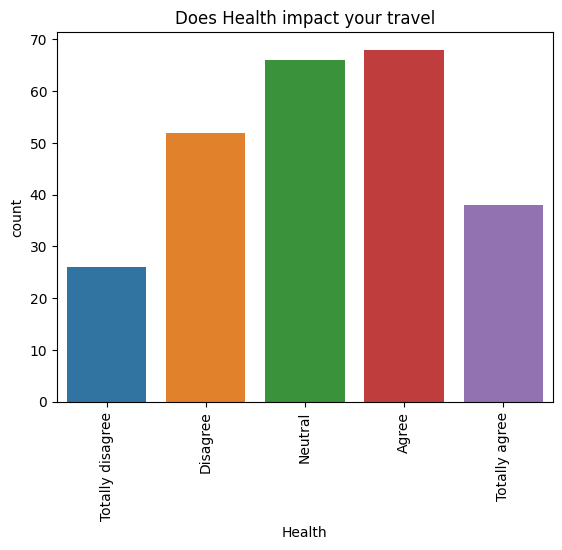

In [27]:
sns.countplot(x='Health', data=df, order=order_likert)
plt.title('Does Health impact your travel')
plt.xticks(rotation=90)
plt.show()

In [28]:
df['Safety'] = df['Safety'].map({1: "Totally disagree", 2: "Disagree", 3: "Neutral", 4: "Agree", 5: "Totally agree"})

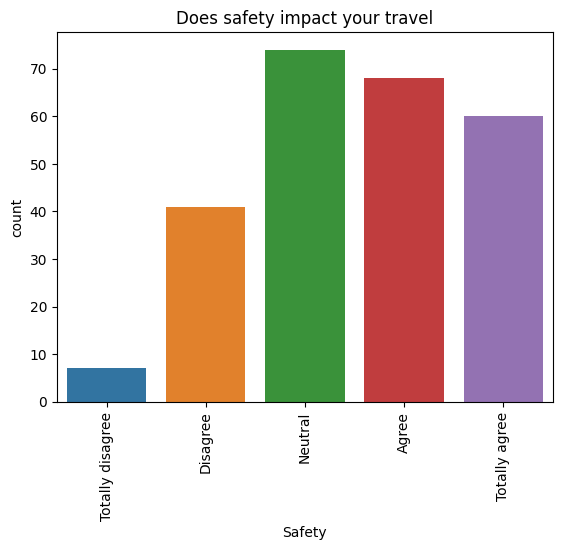

In [29]:
sns.countplot(x='Safety', data=df, order=order_likert)
plt.title('Does safety impact your travel')
plt.xticks(rotation=90)
plt.show()

In [30]:
df['Environment'] = df['Environment'].map({1: "Totally disagree", 2: "Disagree", 3: "Neutral", 4: "Agree", 5: "Totally agree"})

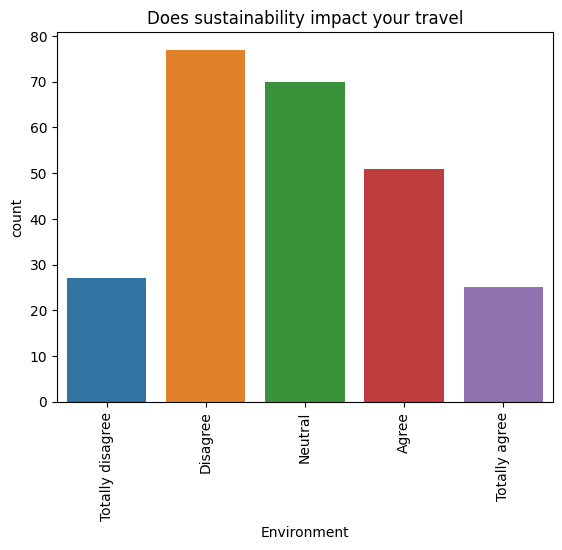

In [31]:
sns.countplot(x='Environment', data=df, order=order_likert)
plt.title('Does sustainability impact your travel')
plt.xticks(rotation=90)
plt.show()

In [32]:
df['Parking'] = df['Parking'].map({1: "Totally disagree", 2: "Disagree", 3: "Neutral", 4: "Agree", 5: "Totally agree"})

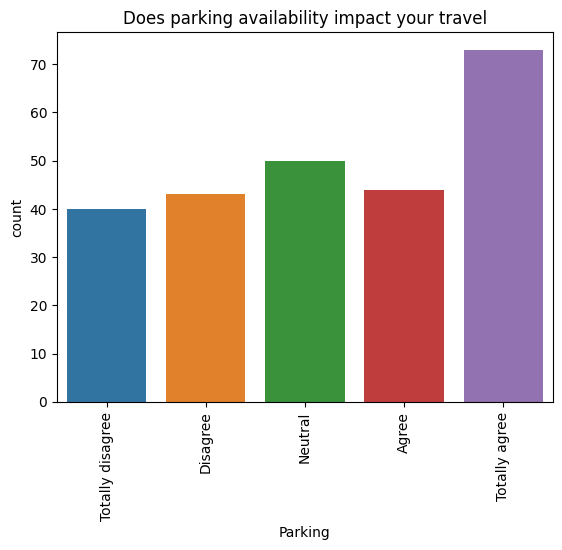

In [33]:
sns.countplot(x='Parking', data=df, order=order_likert)
plt.title('Does parking availability impact your travel')
plt.xticks(rotation=90)
plt.show()

In [34]:
df['Weather'] = df['Weather'].map({1: "Totally disagree", 2: "Disagree", 3: "Neutral", 4: "Agree", 5: "Totally agree"})

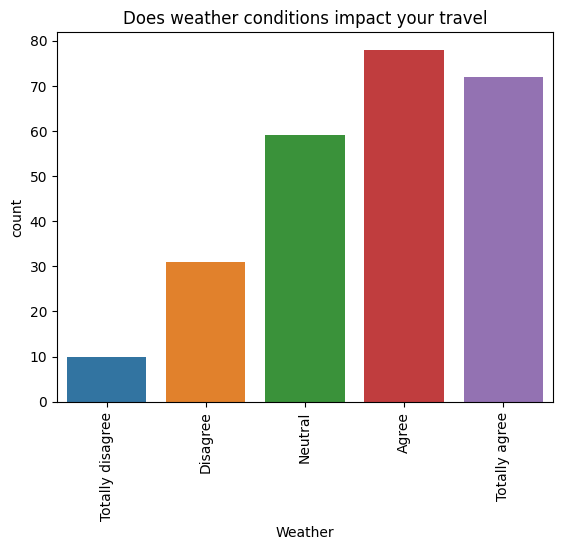

In [35]:
sns.countplot(x='Weather', data=df, order=order_likert)
plt.title('Does weather conditions impact your travel')
plt.xticks(rotation=90)
plt.show()

In [36]:
order_freq = ["Καθόλου", "Σπάνια (1 μέρα  την εβδομάδα)", "Λίγες φορές (2-3 μέρες την εβδομάδα)", "Αρκετές φορές (4-5 μέρες την εβδομάδα)", "Καθημερινά"]

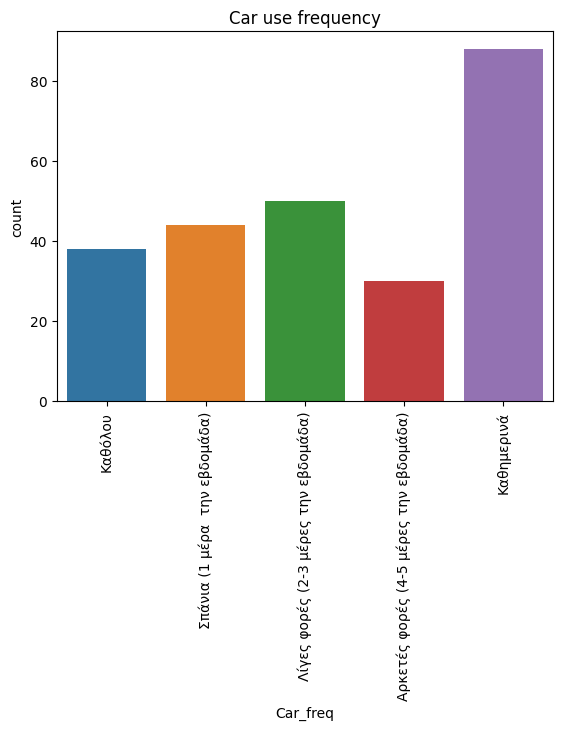

In [37]:
sns.countplot(x='Car_freq', data=df, order=order_freq)
plt.title('Car use frequency')
plt.xticks(rotation=90)
plt.show()

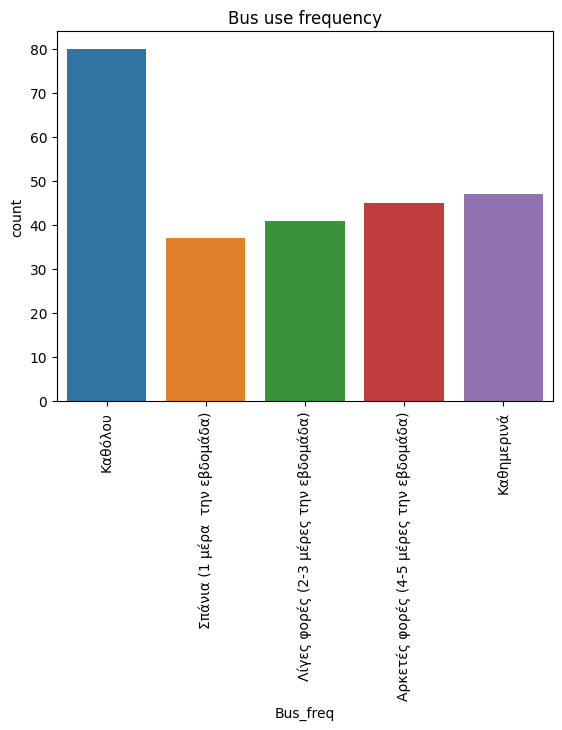

In [38]:
sns.countplot(x='Bus_freq', data=df, order=order_freq)
plt.title('Bus use frequency')
plt.xticks(rotation=90)
plt.show()

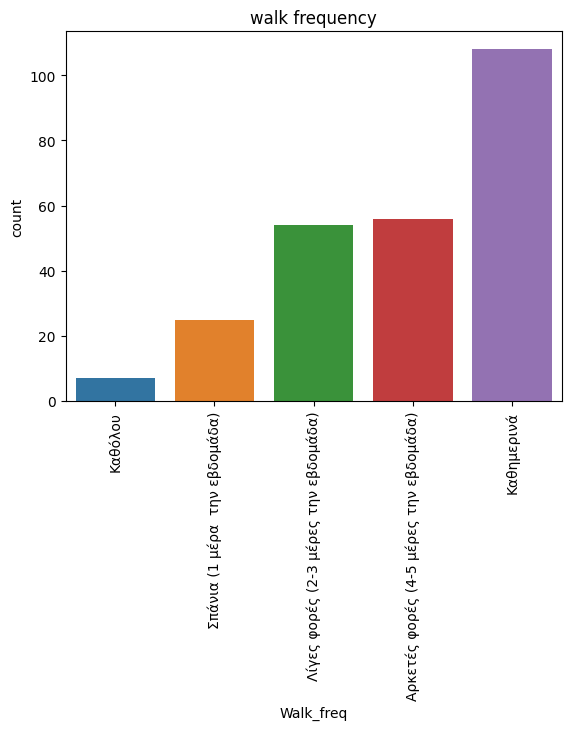

In [39]:
sns.countplot(x='Walk_freq', data=df, order=order_freq)
plt.title('walk frequency')
plt.xticks(rotation=90)
plt.show()

In [40]:
order_age = ["20 και κάτω", "21 - 30", "31 - 40", "41 - 50", "51 - 60"]

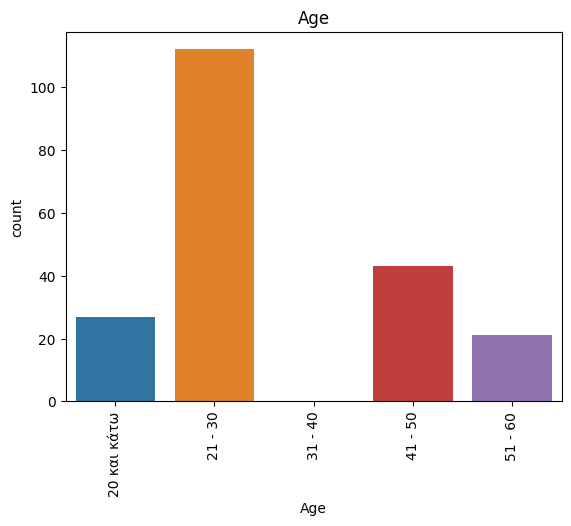

In [41]:
sns.countplot(x='Age', data=df, order = order_age)
plt.title('Age')
plt.xticks(rotation=90)
plt.show()

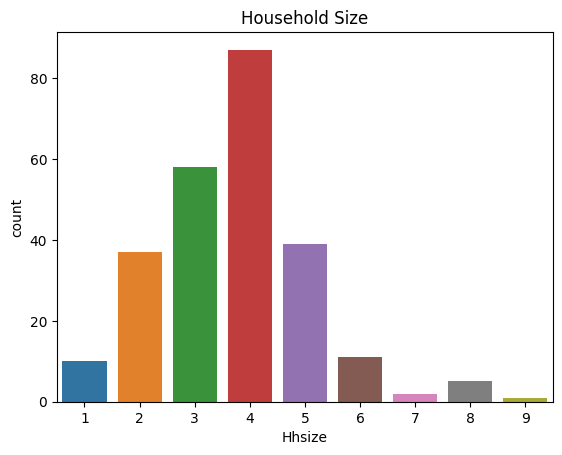

In [42]:
sns.countplot(x='Hhsize', data=df)
plt.title('Household Size')
plt.show()

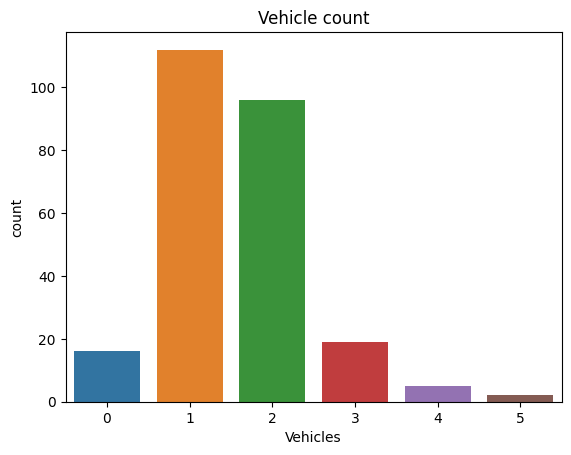

In [43]:
sns.countplot(x='Vehicles', data=df)
plt.title('Vehicle count')
plt.show()

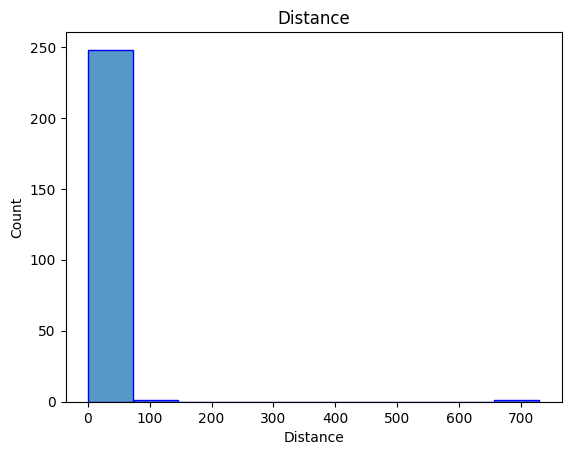

In [44]:
sns.histplot(df['Distance'], bins=10, edgecolor='blue')
plt.ylabel('Count')
plt.title('Distance')
plt.show()

In [45]:
df = df[(df['Distance'] <= 80)]

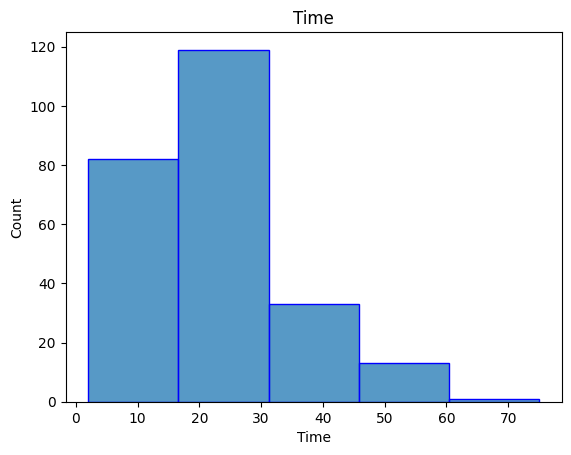

In [46]:
sns.histplot(df['Time'], bins=5, edgecolor='blue')
plt.ylabel('Count')
plt.title('Time')
plt.show()

In [47]:
df.describe()

,Hhsize,Vehicles,Time,Distance
count,248.000000,248.000000,248.000000,248.000000
mean,3.725806,1.564516,23.197581,7.291815
std,1.395996,0.865365,12.489561,7.460269
min,1.000000,0.000000,2.000000,0.400000
25%,3.000000,1.000000,14.750000,1.800000
50%,4.000000,1.000000,21.000000,4.400000
75%,4.000000,2.000000,30.000000,10.050000
max,9.000000,5.000000,75.000000,35.800000


# PREPROCESS

In [48]:
value_mapping = {"Totally disagree":1, "Disagree":2, "Neutral":3, "Agree":4, "Totally agree":5}
df['Convenience'] = df['Convenience'].replace(value_mapping)

In [49]:
value_mapping = {"Totally disagree":1, "Disagree":2, "Neutral":3, "Agree":4, "Totally agree":5}
df['Cost'] = df['Cost'].replace(value_mapping)

In [50]:
value_mapping = {"Totally disagree":1, "Disagree":2, "Neutral":3, "Agree":4, "Totally agree":5}
df['Safety'] = df['Safety'].replace(value_mapping)

In [51]:
value_mapping = {"Totally disagree":1, "Disagree":2, "Neutral":3, "Agree":4, "Totally agree":5}
df['Health'] = df['Health'].replace(value_mapping)

In [52]:
value_mapping = {"Totally disagree":1, "Disagree":2, "Neutral":3, "Agree":4, "Totally agree":5}
df['Weather'] = df['Weather'].replace(value_mapping)

In [53]:
value_mapping = {"Totally disagree":1, "Disagree":2, "Neutral":3, "Agree":4, "Totally agree":5}
df['Environment'] = df['Environment'].replace(value_mapping)

In [54]:
value_mapping = {"Totally disagree":1, "Disagree":2, "Neutral":3, "Agree":4, "Totally agree":5}
df['Parking'] = df['Parking'].replace(value_mapping)

In [55]:
value_mapping = {"Καθόλου":1, "Σπάνια (1 μέρα  την εβδομάδα)":2, "Λίγες φορές (2-3 μέρες την εβδομάδα)":3, "Αρκετές φορές (4-5 μέρες την εβδομάδα)":4, "Καθημερινά":5}
df["Car_freq"] = df["Car_freq"].replace(value_mapping)

In [56]:
value_mapping = {"Καθόλου":1, "Σπάνια (1 μέρα  την εβδομάδα)":2, "Λίγες φορές (2-3 μέρες την εβδομάδα)":3, "Αρκετές φορές (4-5 μέρες την εβδομάδα)":4, "Καθημερινά":5}
df["Bus_freq"] = df["Bus_freq"].replace(value_mapping)

In [57]:
value_mapping = {"Καθόλου":1, "Σπάνια (1 μέρα  την εβδομάδα)":2, "Λίγες φορές (2-3 μέρες την εβδομάδα)":3, "Αρκετές φορές (4-5 μέρες την εβδομάδα)":4, "Καθημερινά":5}
df["Walk_freq"] = df["Walk_freq"].replace(value_mapping)

In [58]:
value_mapping = {"Αμάξι":1, "Λεωφορείο":2, "Πόδια":3}
df['Mode'] = df['Mode'].replace(value_mapping)

In [59]:
le=LabelEncoder()
features=["Gender","Age","Income","Depart_time", "Driver_licence", "Truck_licence", "Motor_licence", "Bike_access"]
for col in features:
    df[col]=le.fit_transform(df[col])

In [60]:
df

,Gender,Age,Driver_licence,Truck_licence,Motor_licence,Bike_access,Hhsize,Vehicles,Income,Mode,...,Cost,Safety,Environment,Health,Weather,Parking,Car_freq,Bus_freq,Walk_freq,Distance
0,0,1,0,0,0,0,4,3,4,2,...,3,2,4,5,3,4,1,4,5,7.12
1,0,1,0,0,0,0,3,1,4,2,...,4,4,2,2,2,3,1,5,3,7.60
2,1,1,0,0,0,0,3,1,0,2,...,5,3,2,1,4,2,1,5,4,6.60
3,0,1,1,0,0,0,3,2,4,1,...,5,5,2,3,5,5,4,1,3,19.60
4,1,1,0,0,0,0,4,1,4,3,...,5,5,5,4,5,1,1,2,5,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,1,1,1,0,0,0,4,3,1,2,...,1,2,3,2,1,1,4,5,5,8.00
246,0,4,1,0,0,0,3,2,2,1,...,5,5,4,4,4,4,5,1,3,29.20
247,0,3,1,0,0,0,3,2,2,1,...,5,4,4,4,4,5,4,1,4,24.30
248,1,0,0,0,0,0,3,0,0,3,...,2,2,4,4,5,2,1,3,5,1.50


<Axes: >

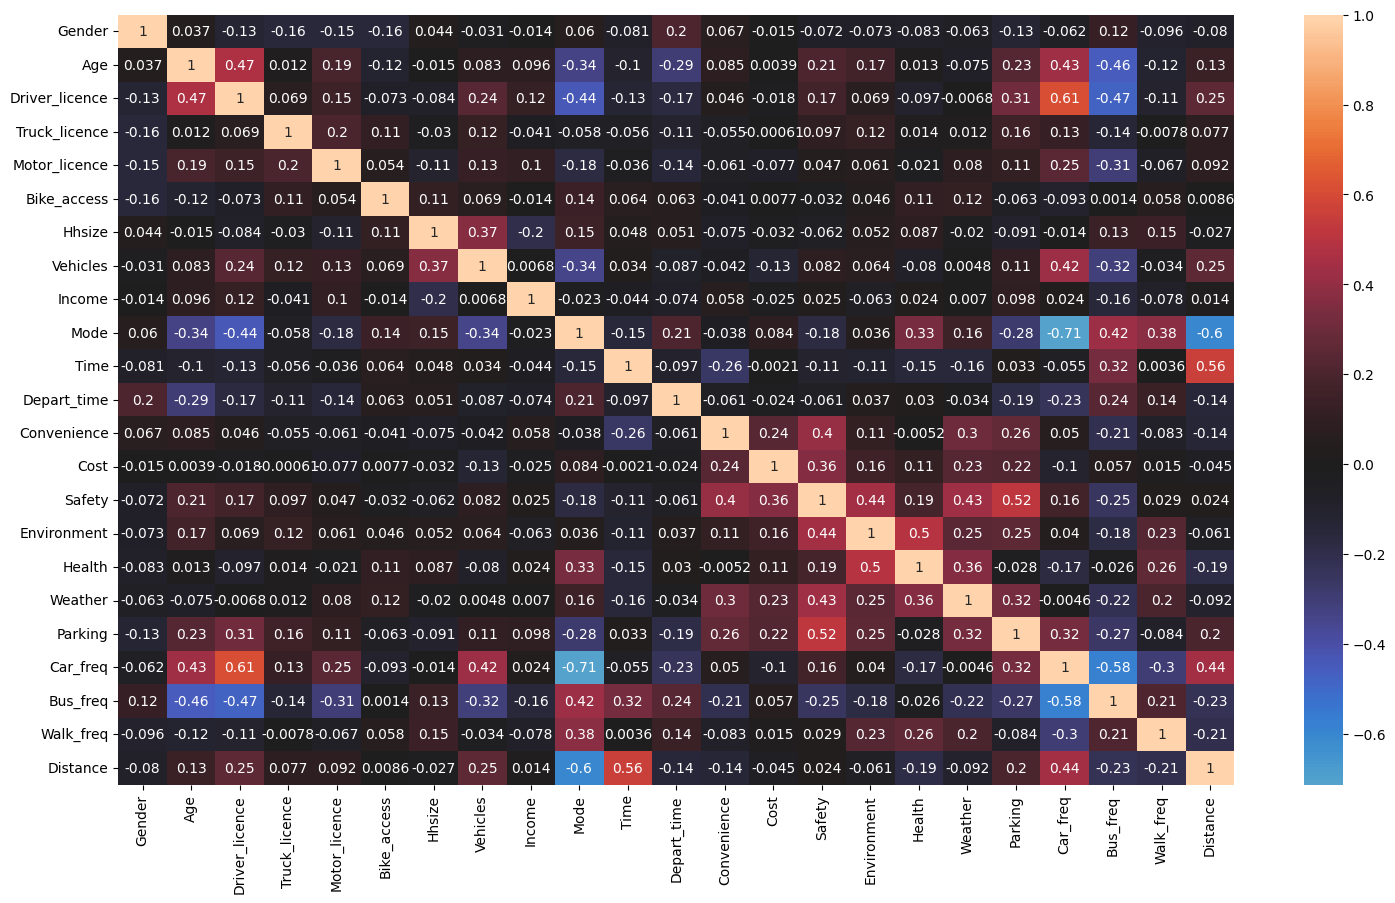

In [61]:
corrMatrix = df.corr()
fig, ax = plt.subplots(figsize=(18, 10))
sns.heatmap(corrMatrix, annot=True, center=0, ax=ax)

In [62]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [63]:
df_with_constant = add_constant(df)
vif_data = pd.DataFrame()
vif_data["Variable"] = df_with_constant.columns
vif_data["VIF"] = [variance_inflation_factor(df_with_constant.values, i) for i in range(df_with_constant.shape[1])]
print(vif_data)

          Variable     VIF
0            const 123.345
1           Gender   1.223
2              Age   1.835
3   Driver_licence   1.918
4    Truck_licence   1.163
5    Motor_licence   1.220
6      Bike_access   1.129
7           Hhsize   1.484
8         Vehicles   1.723
9           Income   1.135
10            Mode   3.466
11            Time   2.406
12     Depart_time   1.275
13     Convenience   1.444
14            Cost   1.262
15          Safety   2.121
16     Environment   1.803
17          Health   1.791
18         Weather   1.857
19         Parking   1.758
20        Car_freq   3.336
21        Bus_freq   2.703
22       Walk_freq   1.404
23        Distance   2.900


In [177]:
X = df[["Convenience","Cost","Safety","Environment","Health","Weather","Parking", "Distance", "Time", "Gender","Age","Income","Depart_time","Driver_licence", "Truck_licence", "Motor_licence", "Bike_access"]]	
y = df["Mode"]

In [178]:
X

,Convenience,Cost,Safety,Environment,Health,Weather,Parking,Distance,Time,Gender,Age,Income,Depart_time,Driver_licence,Truck_licence,Motor_licence,Bike_access
0,1,3,2,4,5,3,4,7.120,60,0,1,4,3,0,0,0,0
1,4,4,4,2,2,2,3,7.600,40,0,1,4,2,0,0,0,0
2,4,5,3,2,1,4,2,6.600,35,1,1,0,2,0,0,0,0
3,5,5,5,2,3,5,5,19.600,40,0,1,4,2,1,0,0,0
4,5,5,5,5,4,5,1,0.400,5,1,1,4,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,1,1,2,3,2,1,1,8.000,35,1,1,1,5,1,0,0,0
246,4,5,5,4,4,4,4,29.200,51,0,4,2,2,1,0,0,0
247,4,5,4,4,4,4,5,24.300,49,0,3,2,3,1,0,0,0
248,2,2,2,4,4,5,2,1.500,22,1,0,0,4,0,0,0,0


In [179]:
X, y = shuffle(X, y, random_state=42)

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =42, stratify=y)

In [181]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [182]:
y_train_series = pd.Series(y_train)
y_test_series = pd.Series(y_test)

# Print class counts for y_train
print("Class counts in y_train:")
print(y_train_series.value_counts())

# Print class counts for y_test
print("\nClass counts in y_test:")
print(y_test_series.value_counts())

Class counts in y_train:
1    68
2    57
3    48
Name: Mode, dtype: int64

Class counts in y_test:
1    30
2    24
3    21
Name: Mode, dtype: int64


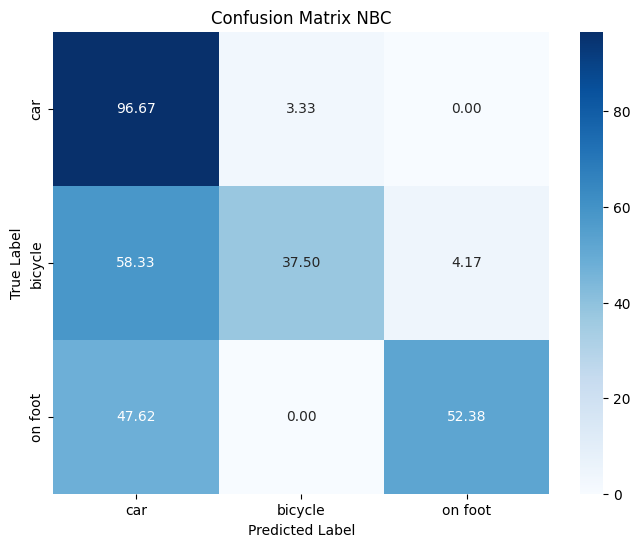

In [183]:
# Create and train a Gaussian Naive Bayes Classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = nb_classifier.predict(X_test)

# Class labels
class_labels = ["car", "bicycle", "on foot"]

conf_matrix_nbc = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
class_accuracies = np.diag(conf_matrix_nbc) / conf_matrix_nbc.sum(axis=1)
conf_matrix_percentages_nbc = (conf_matrix_nbc.T / conf_matrix_nbc.sum(axis=1)).T * 100
sns.heatmap(conf_matrix_percentages_nbc, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix NBC')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [184]:
NBC_Report = classification_report(y_test, y_pred)
print('Tree_Report:', NBC_Report, sep='\n')

Tree_Report:
              precision    recall  f1-score   support

           1       0.55      0.97      0.70        30
           2       0.90      0.38      0.53        24
           3       0.92      0.52      0.67        21

    accuracy                           0.65        75
   macro avg       0.79      0.62      0.63        75
weighted avg       0.76      0.65      0.64        75



# Decision Tree

In [185]:
tree = DecisionTreeClassifier(random_state = 42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [186]:
y_pred_test = tree.predict(X_test)
Tree_Report = classification_report(y_test, y_pred_test)
print('Tree_Report:', Tree_Report, sep='\n')

Tree_Report:
              precision    recall  f1-score   support

           1       0.88      0.73      0.80        30
           2       0.68      0.71      0.69        24
           3       0.80      0.95      0.87        21

    accuracy                           0.79        75
   macro avg       0.79      0.80      0.79        75
weighted avg       0.79      0.79      0.79        75



In [187]:
tree_depth = tree.tree_.max_depth
print("Decision Tree Depth:", tree_depth)

Decision Tree Depth: 9


In [188]:
param_grid = {
    'max_depth': list(range(2, 10))
}

# Initialize the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV
grid_search_dt = GridSearchCV(dt_model, param_grid, cv=10, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search_dt.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             n_jobs=-1, param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9]},
             scoring='accuracy')

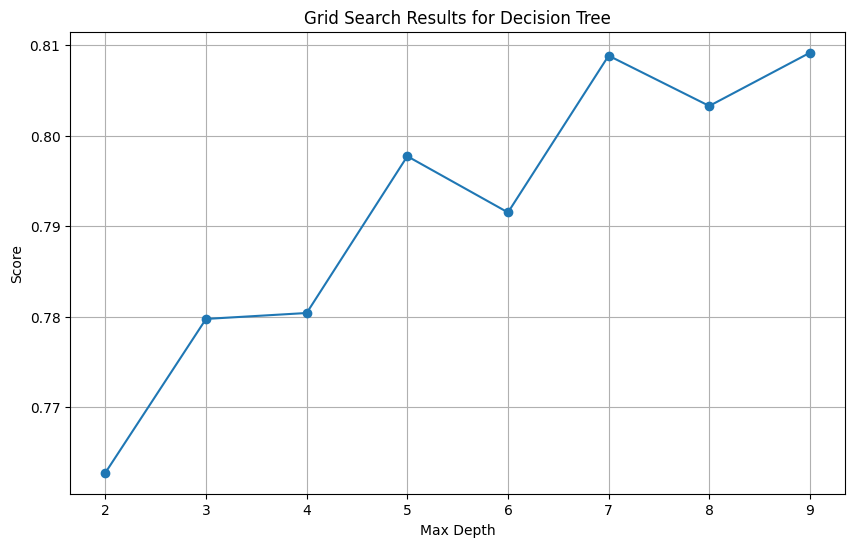

In [189]:
results = grid_search_dt.cv_results_
max_depth_values = results['param_max_depth'].data
mean_accuracy = results['mean_test_score']
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, mean_accuracy, marker='o')
plt.title('Grid Search Results for Decision Tree')
plt.xlabel('Max Depth')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [190]:
tree = DecisionTreeClassifier(random_state = 42, max_depth=9)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9, random_state=42)

In [191]:
y_pred_test = tree.predict(X_test)
Tree_Report = classification_report(y_test, y_pred_test)
print('Tree_Report:', Tree_Report, sep='\n')

Tree_Report:
              precision    recall  f1-score   support

           1       0.88      0.73      0.80        30
           2       0.68      0.71      0.69        24
           3       0.80      0.95      0.87        21

    accuracy                           0.79        75
   macro avg       0.79      0.80      0.79        75
weighted avg       0.79      0.79      0.79        75



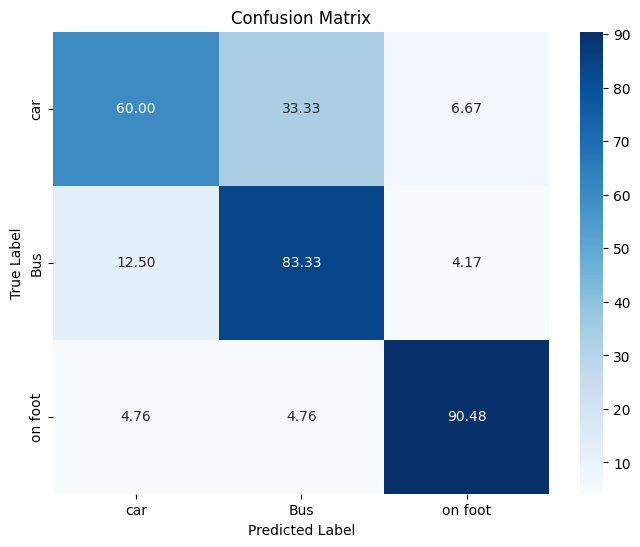

In [137]:
class_labels=["car", "Bus", "on foot"]
conf_matrix_dt = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
class_accuracies = np.diag(conf_matrix_dt) / conf_matrix_dt.sum(axis=1)
conf_matrix_percentages_dt = (conf_matrix_dt.T / conf_matrix_dt.sum(axis=1)).T * 100
sns.heatmap(conf_matrix_percentages_dt, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Random Forest

In [192]:
param_grid = {
    'max_features': range(2, 12)
}

rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=10, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params_rf = grid_search.best_params_
print(best_params_rf)

{'max_features': 6}


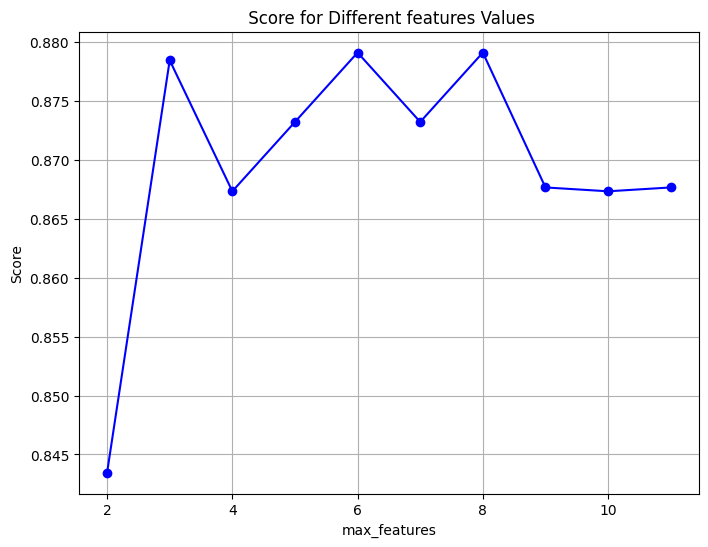

In [193]:
results = grid_search.cv_results_
rates = results['mean_test_score'] 
max_fetures = param_grid['max_features']
plt.figure(figsize=(8, 6))
plt.plot(max_fetures, rates, marker='o', linestyle='-', color='b')
plt.title(' Score for Different features Values')
plt.xlabel('max_features')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [88]:
param_grid = {
    'n_estimators' : range(11, 301)
}

rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)
best_params_rf = grid_search.best_params_
print(best_params_rf)

{'n_estimators': 123}


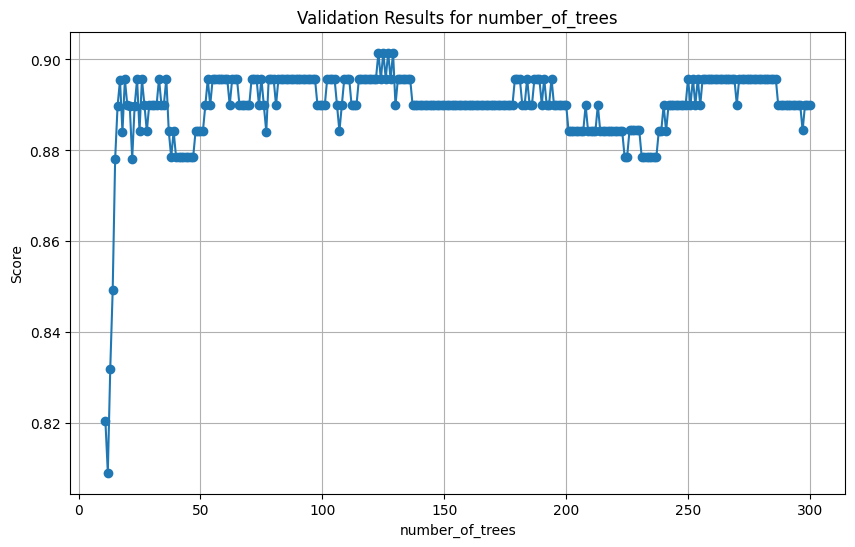

In [89]:
number_of_trees = grid_search.cv_results_['param_n_estimators']
mean_test_scores = grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(number_of_trees, mean_test_scores, marker='o', linestyle='-')
plt.xlabel('number_of_trees')
plt.ylabel('Score')
plt.title('Validation Results for number_of_trees')
plt.grid(True)
plt.show()

In [90]:
param_grid = {
    'max_features': range(2, 4),
    'n_estimators' : range(100, 151)}

In [91]:
rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)
best_params_rf = grid_search.best_params_
print(best_params_rf)

{'max_features': 3, 'n_estimators': 123}


In [194]:
rf_model = RandomForestClassifier(random_state=42, max_features=6)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
Rf_Report = classification_report(y_test, y_pred)
print('Rf_Report:', Rf_Report, sep='\n')

Rf_Report:
              precision    recall  f1-score   support

           1       0.90      0.87      0.88        30
           2       0.83      0.79      0.81        24
           3       0.83      0.90      0.86        21

    accuracy                           0.85        75
   macro avg       0.85      0.85      0.85        75
weighted avg       0.85      0.85      0.85        75



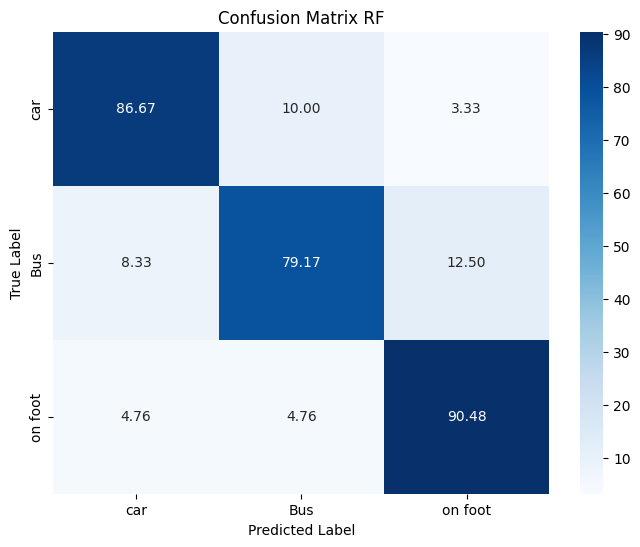

In [195]:
class_labels=["car", "Bus", "on foot"]
conf_matrix_rf = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
class_accuracies = np.diag(conf_matrix_rf) / conf_matrix_rf.sum(axis=1)
conf_matrix_percentages_dt = (conf_matrix_rf.T / conf_matrix_rf.sum(axis=1)).T * 100
sns.heatmap(conf_matrix_percentages_dt, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix RF')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# KNN

In [149]:
knn_model = KNeighborsClassifier()

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19],
}

grid_search = GridSearchCV(knn_model, param_grid, cv=10, scoring='accuracy')

grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19]},
             scoring='accuracy')

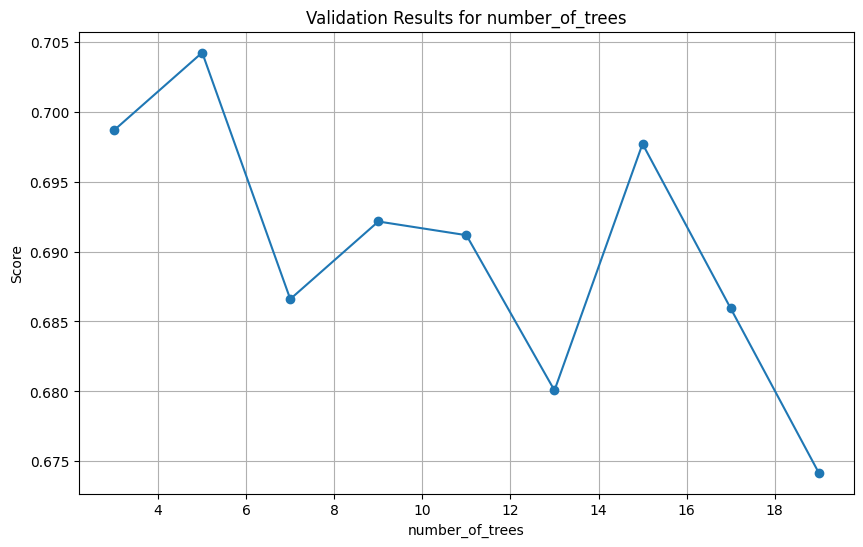

In [150]:
number_of_trees = grid_search.cv_results_['param_n_neighbors']
mean_test_scores = grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(number_of_trees, mean_test_scores, marker='o', linestyle='-')
plt.xlabel('number_of_trees')
plt.ylabel('Score')
plt.title('Validation Results for number_of_trees')
plt.grid(True)
plt.show()

In [151]:
rf_model = knn_model = KNeighborsClassifier(n_neighbors=5)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
Rf_Report = classification_report(y_test, y_pred)
print('Rf_Report:', Rf_Report, sep='\n')

Rf_Report:
              precision    recall  f1-score   support

           1       0.74      0.77      0.75        30
           2       0.66      0.79      0.72        24
           3       0.87      0.62      0.72        21

    accuracy                           0.73        75
   macro avg       0.75      0.73      0.73        75
weighted avg       0.75      0.73      0.73        75



In [196]:
logreg_model = LogisticRegression(random_state=42)

In [197]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100],
              'penalty': ['l1','l2'],
              'solver': ['lbfgs', 'liblinear'],
              'max_iter': [100, 200, 300]}

In [198]:
grid_search_log = GridSearchCV(logreg_model, param_grid, cv=10, scoring='accuracy')

In [199]:
grid_search_log.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 300], 'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear']},
             scoring='accuracy')

In [200]:
log_params = grid_search_log.best_params_
print(log_params)

{'C': 10, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [201]:
logreg_model = LogisticRegression(random_state=42, C=10, max_iter=100, penalty='l1', solver='liblinear')
logreg_model.fit(X_train, y_train)

LogisticRegression(C=10, penalty='l1', random_state=42, solver='liblinear')

In [202]:
y_pred_log = logreg_model.predict(X_test)
Log_Report = classification_report(y_test, y_pred_log)
print('Log_Report:', Log_Report, sep='\n')

Log_Report:
              precision    recall  f1-score   support

           1       0.90      0.90      0.90        30
           2       0.87      0.83      0.85        24
           3       0.91      0.95      0.93        21

    accuracy                           0.89        75
   macro avg       0.89      0.90      0.89        75
weighted avg       0.89      0.89      0.89        75

